In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_test = pd.read_pickle("../../datasets/topoprocessed/test.pkl")
pt_cols = [col for col in df_test.columns if 'pt' in col]

sig_test = df_test.loc[df_test['is_signal_new'] == 1, df_test.columns != 'is_signal_new']
bkg_test = df_test.loc[df_test['is_signal_new'] == 0, df_test.columns != 'is_signal_new']
del df_test

df_train = pd.read_pickle("../../datasets/topoprocessed/train.pkl")
df_val = pd.read_pickle("../../datasets/topoprocessed/val.pkl")

sig_train = df_train.loc[df_train['is_signal_new'] == 1, df_train.columns != 'is_signal_new']
bkg_train = df_train.loc[df_train['is_signal_new'] == 0, df_train.columns != 'is_signal_new']
sig_val = df_val.loc[df_val['is_signal_new'] == 1, df_val.columns != 'is_signal_new']
bkg_val = df_val.loc[df_val['is_signal_new'] == 0, df_val.columns != 'is_signal_new']
del df_train
del df_val

In [3]:
pd.read_pickle("../../datasets/topoprocessed/val.pkl")

,pt_0,eta_0,phi_0,pt_1,eta_1,phi_1,pt_2,eta_2,phi_2,pt_3,...,pt_27,eta_27,phi_27,pt_28,eta_28,phi_28,pt_29,eta_29,phi_29,is_signal_new
0,0.144799,5.551115e-17,0.0,0.079097,5.551115e-17,-0.002438,0.041239,-0.006056,-0.005115,0.012533,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.187016,-5.551115e-17,0.0,0.051907,-5.551115e-17,-0.088659,0.033558,0.002496,-0.006484,0.027058,...,0.000773,-0.166824,0.250868,0.000761,0.095307,0.092040,0.000679,-0.487340,0.209430,0
2,0.085016,-5.551115e-17,0.0,0.038148,-5.551115e-17,-0.754466,0.030369,0.017291,-0.701730,0.022291,...,0.001656,0.053437,-0.587647,0.001535,0.202006,-0.569549,0.001369,-0.060970,-0.687087,0
3,0.030216,-5.551115e-17,0.0,0.023647,-5.551115e-17,-0.126352,0.022609,0.011110,-0.057566,0.019622,...,0.004096,-0.088775,-0.106073,0.003631,-0.043116,-0.077306,0.003699,0.180711,-0.322967,0
4,0.234150,-5.551115e-17,0.0,0.024286,-5.551115e-17,0.000000,0.020718,0.124118,-0.018099,0.015589,...,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402995,0.108927,5.551115e-17,0.0,0.040432,5.551115e-17,-0.053247,0.034958,0.008574,-0.054769,0.017487,...,0.002517,0.088167,-0.097764,0.002429,0.216401,-0.620688,0.002063,0.295297,-0.512913,1
402996,0.053553,-5.551115e-17,0.0,0.046589,-5.551115e-17,-0.081577,0.046088,0.076633,0.076811,0.040098,...,0.001159,-0.048971,-0.461313,0.001062,0.065044,-0.138027,0.000974,-0.132953,-0.132558,1
402997,0.088775,5.551115e-17,0.0,0.045301,5.551115e-17,-0.432835,0.027476,0.070833,-0.396197,0.022275,...,0.001662,0.097394,0.102456,0.001656,-0.115584,-0.022442,0.001555,-0.012774,-0.260352,1
402998,0.108132,-5.551115e-17,0.0,0.077419,2.220446e-16,-0.314219,0.030001,0.246023,-0.739659,0.025742,...,0.002059,-0.032635,-0.280225,0.001707,0.203912,0.040419,0.001705,0.373607,-0.811040,1


In [4]:
#Calculate Histograms of Train/Test/Val Feature Distributions

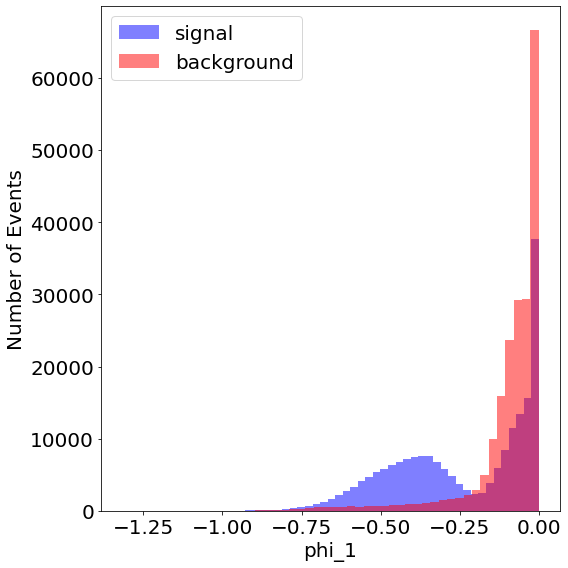

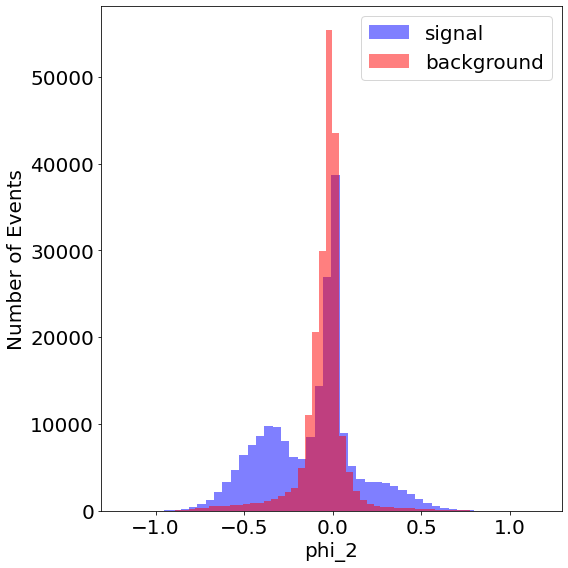

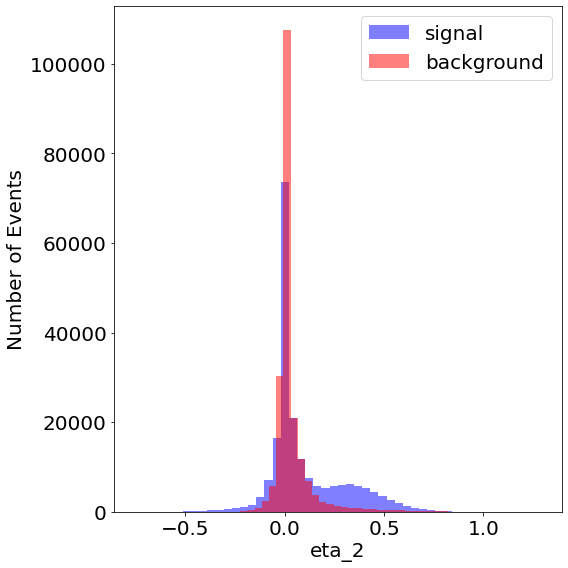

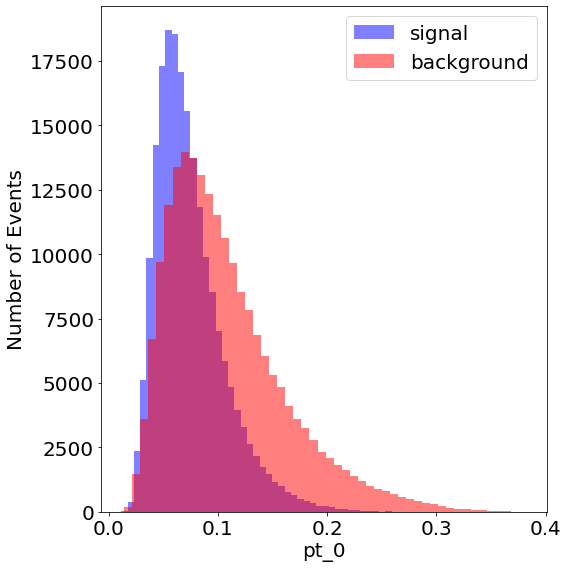

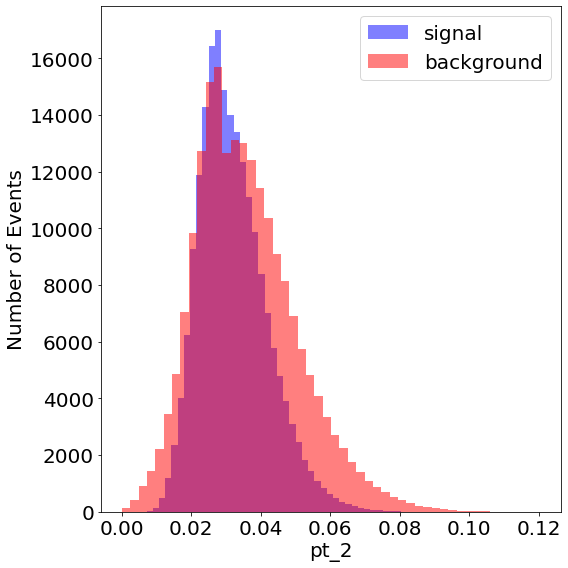

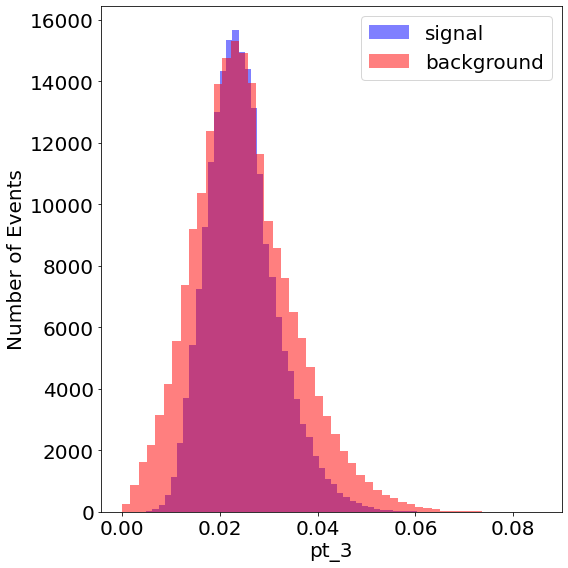

In [5]:
feats_to_plot = ['phi_1', 'phi_2', 'eta_2', 'pt_0', 'pt_2', 'pt_3']
for feat in feats_to_plot:
    plt.figure(figsize=(8,8))
    plt.hist(sig_test.iloc[:, sig_train.columns==feat], bins = 50, 
             label = 'signal', alpha=0.5, color='blue')
    plt.hist(bkg_test.iloc[:, sig_train.columns==feat], bins = 50, 
             label = 'background', alpha=0.5, color='red')
    plt.xlabel(feat, fontsize=20)
    plt.ylabel("Number of Events", fontsize = 20)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.legend(fontsize = 20)
    plt.tight_layout()
    plt.savefig("figures/FeatDist_TopoDNN_{}.png".format(feat))

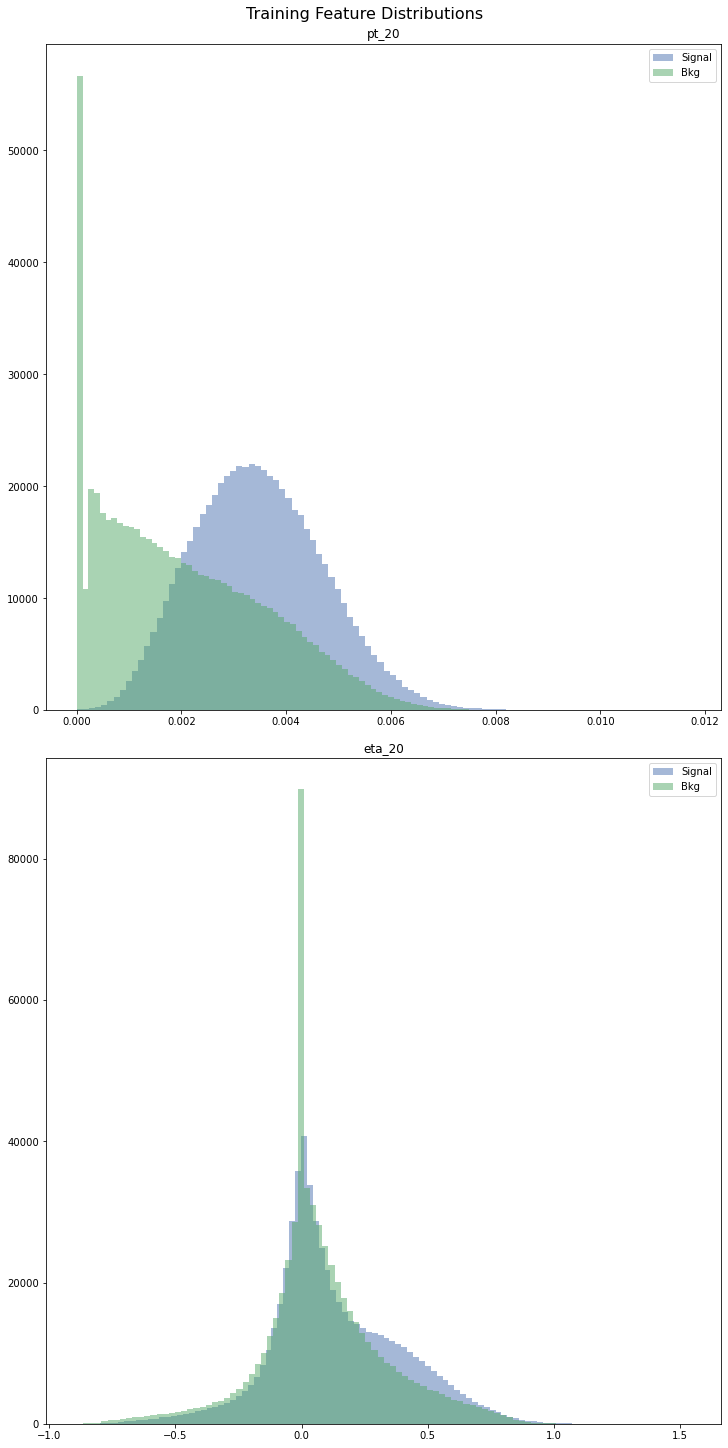

In [6]:
#Train feature distribtuions
n_bins = 100
plt.style.use('seaborn-deep')
f, a = plt.subplots(2, 1, constrained_layout=True, figsize=(10,20))
f.suptitle('Training Feature Distributions', fontsize=16)
a = a.ravel()
for idx,ax in enumerate(a):
    #ax.axes.yaxis.set_ticklabels([])
    ax.hist(sig_train.iloc[:, idx+60], bins=n_bins, alpha=0.5, label = 'Signal')
    ax.hist(bkg_train.iloc[:, idx+60], bins=n_bins, alpha=0.5, label = 'Bkg')
    ax.set_title(sig_train.columns[idx+60])
    ax.legend(loc='upper right')
#Saves feature distribution
#plt.savefig('figures/train_features.png', dpi = 150, bbox_inches = 'tight')

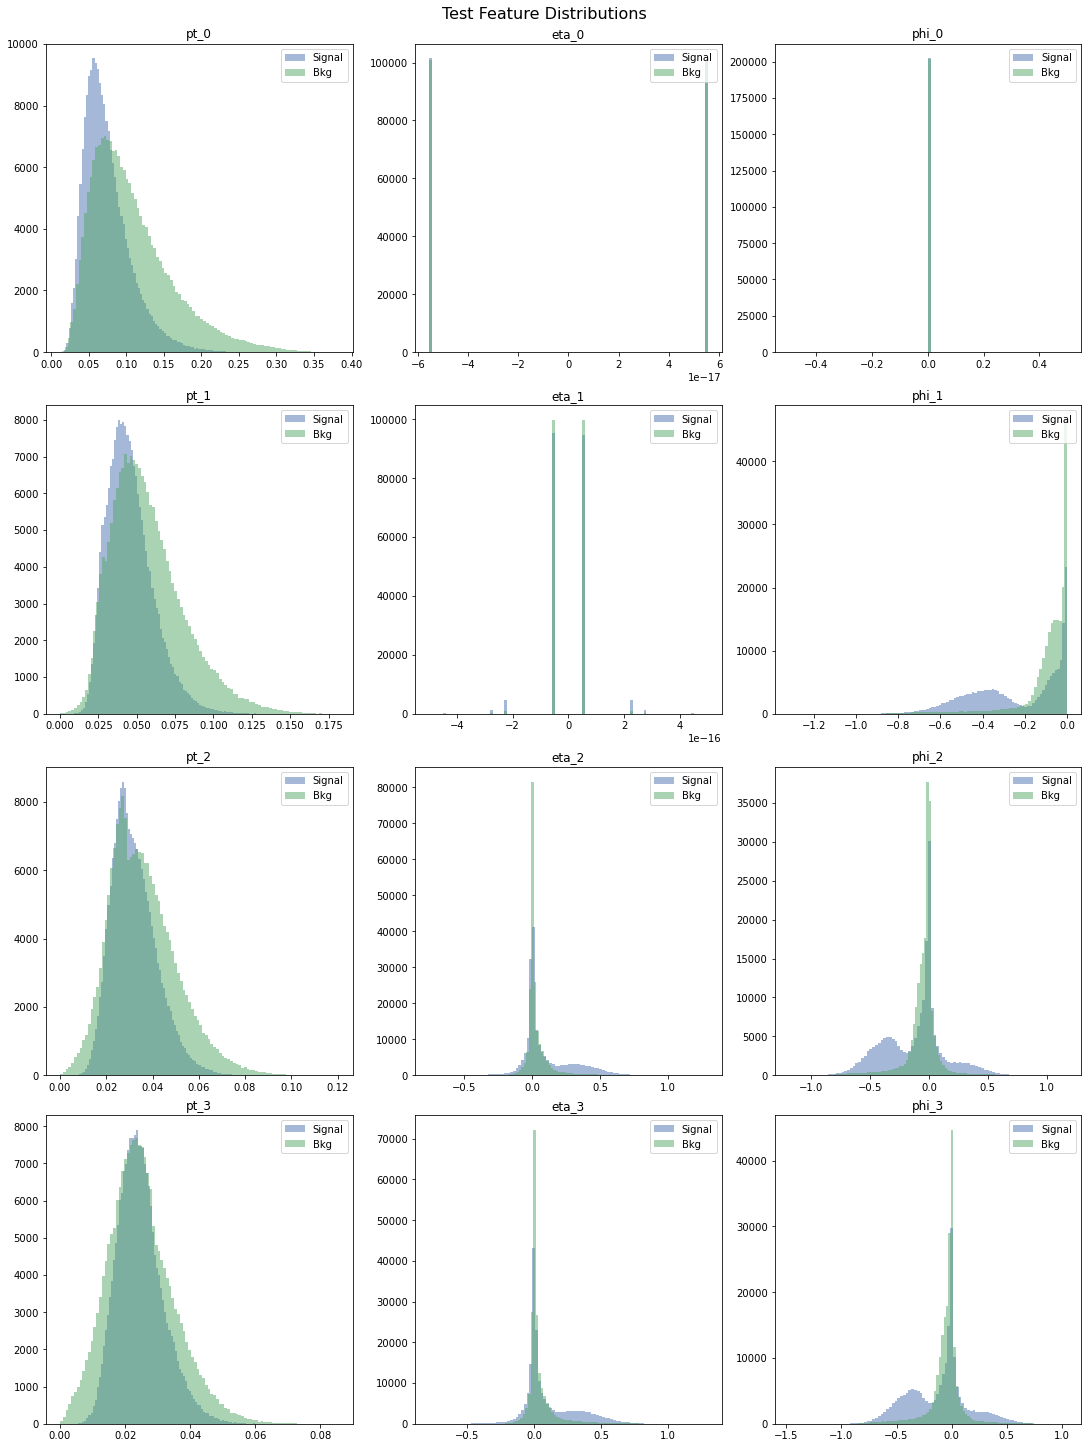

In [7]:
#Test feature distribtuions
n_bins = 100
plt.style.use('seaborn-deep')
f, a = plt.subplots(4, 3, constrained_layout=True, figsize=(15,20))
f.suptitle('Test Feature Distributions', fontsize=16)
a = a.ravel()
for idx,ax in enumerate(a):
    #ax.axes.yaxis.set_ticklabels([])
    ax.hist(sig_test.iloc[:, idx], bins=n_bins, alpha=0.5, label = 'Signal')
    ax.hist(bkg_test.iloc[:, idx], bins=n_bins, alpha=0.5, label = 'Bkg')
    ax.set_title(sig_train.columns[idx])
    ax.legend(loc='upper right')
#Saves feature distribution
#plt.savefig('figures/test_features.png', dpi = 150, bbox_inches = 'tight')

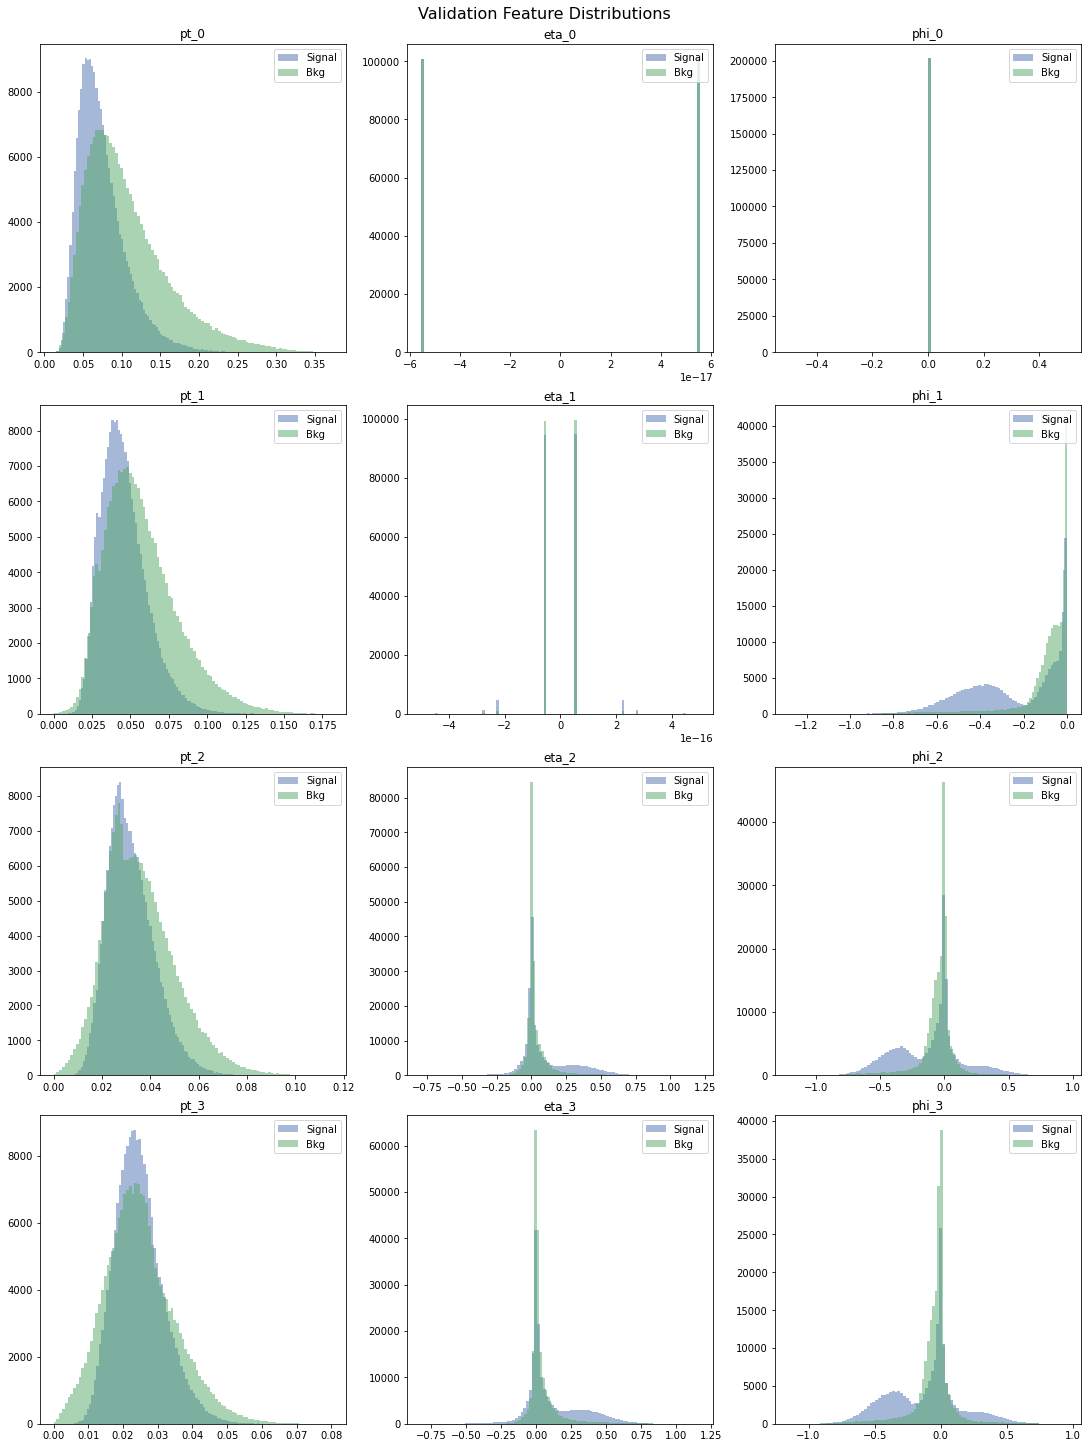

In [8]:
#Val feature distribtuions
n_bins = 100
plt.style.use('seaborn-deep')
f, a = plt.subplots(4, 3, constrained_layout=True, figsize=(15,20))
f.suptitle('Validation Feature Distributions', fontsize=16)
a = a.ravel()
for idx,ax in enumerate(a):
    #ax.axes.yaxis.set_ticklabels([])
    ax.hist(sig_val.iloc[:, idx], bins=n_bins, alpha=0.5, label = 'Signal')
    ax.hist(bkg_val.iloc[:, idx], bins=n_bins, alpha=0.5, label = 'Bkg')
    ax.set_title(sig_train.columns[idx])
    ax.legend(loc='upper right')
#Saves feature distribution
#plt.savefig('figures/val_features.png', dpi = 150, bbox_inches = 'tight')